###Conversation Generator and Sentiment Analyzer

In [1]:
# Importing necessary libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import torch
# Load GPT-3 model and tokenizer from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-neo-2.7B")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
  # Function to generate response using GPT-3 model
def generate_response(user_input, max_length=100):
    # Tokenize the user input
    input_ids = tokenizer.encode(user_input, return_tensors="pt")
    # Create attention mask
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    # Generate response from the model
    response = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, top_p=0.95, temperature=0.9, pad_token_id=tokenizer.eos_token_id)
    # Decode and return the response
    return tokenizer.decode(response[0], skip_special_tokens=True)

In [3]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    # Analyze sentiment using TextBlob
    analysis = TextBlob(text)
    # Return sentiment label based on polarity
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

In [4]:
def generate_report(sentiments):
    # Count sentiment occurrences
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")
    neutral_count = sentiments.count("neutral")

    # Prepare data for pie chart visualization
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    explode = (0.1, 0, 0)

    # Create pie chart
    plt.subplot(1, 2, 1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Sentiment Analysis Results')
    plt.axis('equal')

    # Create bar graph
    plt.subplot(1, 2, 2)
    x = range(len(labels))
    plt.bar(x, sizes, color=colors)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Analysis Results')
    plt.xticks(x, labels)

    plt.tight_layout()
    plt.show()

    # Print sentiment counts
    print("Positive Sentiments:", positive_count)
    print("Negative Sentiments:", negative_count)
    print("Neutral Sentiments:", neutral_count)

In [5]:
# Main function for interaction
def main():
    print("Welcome to Conversation Generator!")
    print("Type 'exit' to end the conversation.")

    sentiments = []

    while True:
        # Prompt user input
        user_input = input("You: ")
        # Check if user wants to exit
        if user_input.lower() == 'exit':
            break

        # Generate response from GPT-3
        response = generate_response(user_input)
        # Analyze sentiment of the response
        sentiment = analyze_sentiment(response)
        # Append sentiment to list
        sentiments.append(sentiment)

        # Print bot's response and sentiment
        print("Bot:", response)
        print("Sentiment:", sentiment)

    # Generate report and visualizations
    print("\nGenerating Report...")
    generate_report(sentiments)



Welcome to Conversation Generator!
Type 'exit' to end the conversation.
You: What is AI ?
Bot: What is AI?

AI is the science of making machines intelligent. It is a field of computer science that studies the relationship between computers and other intelligent agents.
The term artificial intelligence (AI) was first coined by John McCarthy in 1956. AI is an umbrella term for a variety of related fields, including cognitive science, robotics, and machine learning. The term AI was coined in the 1950s by computer scientist John von Neumann, who was inspired by the work of the mathematician Alan Turing
Sentiment: positive
You: Explain Machine Learning
Bot: Explain Machine Learning

Machine learning is a field of computer science that uses algorithms to learn from data. It is used in many different fields, including computer vision, speech recognition, and natural language processing.
In this course, we will learn about the different types of machine learning algorithms and how they work. W

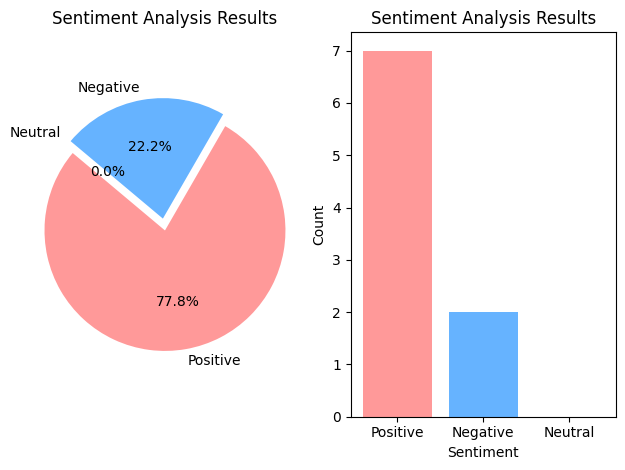

Positive Sentiments: 7
Negative Sentiments: 2
Neutral Sentiments: 0


In [10]:
main()